# Bias Detection Engine Demo: Criminal Justice

In this notebook, we analyze the (simulated) data set of crime elements for the crime type "Burglary". The data set consists of the following variables:

* Crime Elements - an element of a crime is one of a set of facts that must all be proven to convict a defendant of a crime. For the Burglary data set we have the following possible crime elements (the values of these variables are boolean i.e. True or False):
    * Breaking&Entering
    * Stated intent with partner
    * Happened at night
    * Elements of assault identified
    * Elements of theft identified

* Race - Demographic information of the defendant. We have included the following:
    * White
    * Black
    * Hispanic
    * Other

* Sentencing - The length of sentencing charged for the defendant

* Stage of Legal Procedure - This variable corresponds to our "bias output" detection i.e. it is used to indicate in which stage of the legal process is the bias detected to be the highest among various ethnic groups. The stages of legal process we considered are:
    * Investigation
    * Initial Hearing/Arraignment
    * Plea Bargaining
    * Pre-Motion Trials

In [1]:
!pip install -q aif360
!pip install -q seaborn

In [2]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from engine import bias_table, bias_grid
# from weighted_data import weighted_data

In [3]:
df = pd.read_csv('../data/weighted_crime_elements_data_for_burglary.csv', index_col=0)
# df = weighted_data(5000, [0.4, 0.2, 0.33, 0.07], [0.4, 0.3, 0.25, 0.05], [1]*6, [1]*6)
order = ['Investigation', 'Initial Hearing/Arraignment', 'Plea Bargaining', 'Pre-Trial Motions']
df['Stage of Legal Procedure'] = df['Stage of Legal Procedure'].astype('category').cat.reorder_categories(order, ordered=True)

stages = pd.DataFrame([order]*len(df), columns=order).astype('category')
for s in stages:
    stages[s].cat.set_categories(order, ordered=True, inplace=True)
df[order] = stages.le(df['Stage of Legal Procedure'], axis=0)
# df

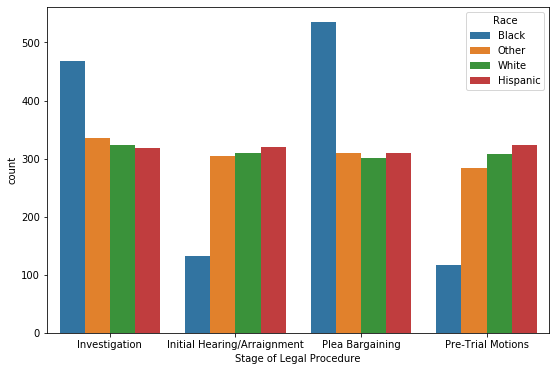

In [27]:
plt.figure(figsize=(9, 6))
sns.countplot(x='Stage of Legal Procedure', hue='Race', data=df[['Race', 'Stage of Legal Procedure']]);

This is one view of our data. We can clearly see that a large proportion of black defendants take a plea bargain.

Let's analyze in more depth with the bias detection engine why this is the case:

In [4]:
outcomes = df.drop(columns=['Breaking&Entering', 'Stated intent with partner', 'Happened at night', 'Elements of assault identified', 'Elements of theft identified', 'Stage of Legal Procedure', 'Sentencing']).set_index('Race')
bias_table(outcomes, None, 'defendants')

Closer to 1 is better. Disparate impact < 0.8 implies bias against moving forward (red), > 1.25 implies bias for moving forward (blue).

First, we can see that black defendants are more likely to continue past the initial hearing whereas other groups are more likely to stop here, possibly with just a warning. We also see that black defendants are less likely to go to trial implying they may be coerced into taking a plea deal. 

We can also see the proportion of defendants is equally distributed by race which does not reflect race demographics in the general U.S. population.